In [3]:
import numpy as np

In [4]:
class NearestNeighbour:
    
    def __init__(self):
        pass
    
    def train(self, X, Y):
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.Ytr.dtype)
        
        for i in range(num_test):
            
            distance = np.sum(np.abs(self.Xtr - X[i, :]), axis=1)
            min_index = np.argmin(distance)
            Ypred[i] = self.Ytr[min_index]
            
        return Ypred

In [13]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [103]:


def calculate_eculid(point_a, point_b):
    return math.sqrt((point_a[0] - point_b[0]) ** 2 + (point_a[1] - point_b[1]) ** 2)

def manhatten(point_a, point_b):
    return np.abs(point_a[0] - point_b[0]) + np.abs(point_a[1] - point_b[1])

def dot(point_a, point_b):
    return np.dot(point_a, point_b)

def classify_a_point(points, inp_point, k=3):
    
    distances = list()
    
    for group in points:
        for point in points[group]:
            # distances.append((calculate_eculid(point, inp_point), group))
            # distances.append((manhatten(point, inp_point), group))
            distances.append((dot(point, inp_point), group))
            
    distances = sorted(distances)[:k]
    
    
    freq_a = 0
    freq_b = 0
    for distance in distances:
        if distance[1] == 0:
            freq_a += 1
        else:
            freq_b += 1

    zero = points[0]
    one = points[1]

    zero_x = list()
    zero_y = list()
    one_x = list()
    one_y = list()

    for point in zero:
        zero_x.append(point[0])
        zero_y.append(point[1])

    for point in one:
        one_x.append(point[0])
        one_y.append(point[1])

    plt.scatter(zero_x, zero_y)
    plt.scatter(one_x, one_y)
    plt.scatter(inp_point[0], inp_point[1])
    plt.show()
            
    return 0 if freq_a > freq_b else 1
    

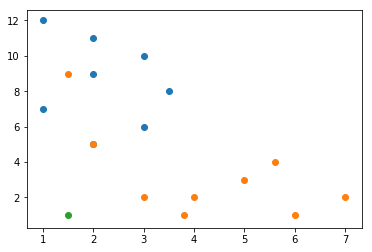

1


In [104]:
points = {0:[(1,12),(2,5),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)], 
          1:[(5,3),(3,2),(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]}

print (classify_a_point(points, (1.5, 1), k=5))

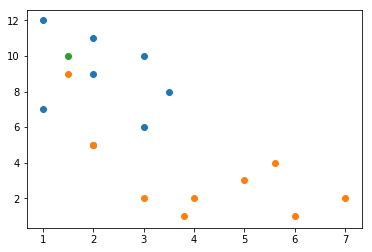

1


In [105]:
print (classify_a_point(points, (1.5, 10), k=5))

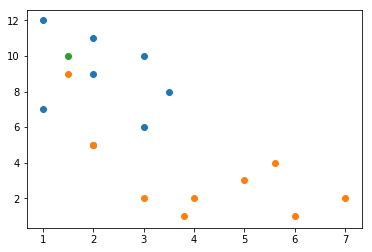

1


In [106]:
print (classify_a_point(points, (1.5, 10), k=1))

In [56]:
print (np.random.randint(0, 255, (6, 6)))

[[180  33  16 235  60 218]
 [137 101 156  99  81  75]
 [ 61 157 196 109  20 127]
 [108  64 213 100  53 101]
 [101  66 141 118   5 150]
 [243 160 246  92 147 248]]


In [59]:
print (np.random.random((3, 3)))

[[ 0.7593872   0.32378695  0.96536766]
 [ 0.94210621  0.45033773  0.33003215]
 [ 0.38132587  0.76170151  0.18135076]]


In [60]:
print (np.random.random((3, 3)))

[[ 0.4654124   0.33845439  0.0800069 ]
 [ 0.29572835  0.06614855  0.77191279]
 [ 0.87202031  0.54756442  0.49787856]]


In [107]:
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value > 255:
        return 255
    return value


def convolve_2d_kernel(inp_img, kernel, squash_pixel=True):
    padded_arr = np.pad(inp_img, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_arr = np.zeros(inp_img.shape)
    
    for i in range(padded_arr.shape[0] - kernel_width + 1):
        for j in range(padded_arr.shape[1] - kernel_height + 1):
            temp_arr = padded_arr[i: i + kernel_width, j: j+kernel_height]
            if squash_pixel:
                transformed_arr[i, j] = squash_pixel_value(np.sum(temp_arr * kernel)  / (len(kernel) ** 2))
            else:
                transformed_arr[i, j] = np.sum(temp_arr * kernel) / (len(kernel) ** 2)

    return transformed_arr


In [108]:
np.random.uniform(-1, 1, (3, 3))

array([[-0.85189233,  0.59444472, -0.9932136 ],
       [ 0.66583509, -0.40545541,  0.96137405],
       [ 0.61511852, -0.64863654,  0.90947444]])

In [109]:
np.random.uniform(-1, 1, (3, 3))

array([[-0.2886057 , -0.58218359, -0.38961817],
       [-0.01068112, -0.97104013, -0.40908814],
       [-0.21431185,  0.35105214,  0.18035171]])

In [110]:
arr = [-1, 0, 1]


filter1 = np.random.choice(arr, (3, 3))

filter2 = np.random.choice(arr, (3, 3))

mat = np.array([[180,33,16,235,60,218],
 [137,101,156,99,81,75],
 [ 61,157,196,109,20,127],
 [108,64,213,100,53,101],
 [101,66,141,118,5,150],
 [243,160,246,92,147,248]])

In [111]:
filter1_1 = convolve_2d_kernel(mat, filter1)
filter1_2 = convolve_2d_kernel(mat, filter2)
print ('*' * 30, ' FILTER1_1', '*' * 30)
print (filter1_1)
print('\n' * 2)
print ('*' * 30, ' FILTER1_2', '*' * 30)
print (filter1_2)

******************************  FILTER1_1 ******************************
[[ 38.88888889   1.44444444  34.          26.44444444  28.88888889
   23.55555556]
 [ 49.55555556  41.11111111   8.33333333  29.77777778   0.          44.44444444]
 [ 40.22222222  28.22222222  56.77777778   3.77777778  11.77777778
   27.77777778]
 [ 19.66666667  22.55555556  52.77777778  24.33333333   0.          41.44444444]
 [ 50.44444444   0.          50.88888889   1.77777778  18.          39.11111111]
 [ 48.66666667  36.77777778  40.11111111  39.11111111  27.77777778
   44.22222222]]



******************************  FILTER1_2 ******************************
[[ 38.88888889  36.66666667  48.88888889  45.55555556  66.          39.22222222]
 [ 13.22222222  37.55555556  55.88888889  21.55555556   0.           0.55555556]
 [ 21.          26.66666667  46.44444444  18.88888889  14.33333333
   10.22222222]
 [ 23.55555556  25.88888889  18.33333333  19.88888889  14.44444444
   17.44444444]
 [ 33.55555556  32.88888889  3

## Activation

In [128]:
def apply_activation(value):
    return max(0.0, value)

In [130]:
f = np.vectorize(apply_activation, otypes=[np.float])
act_1 = f(filter1_1)
act_2 = f(filter1_2)

## Max pool

In [143]:
def max_pool(mat, kernel_size=2, stride=2):
    pool_mat = np.zeros((mat.shape[0] // stride, mat.shape[1] // stride))
    for i in range(0, mat.shape[0], stride):
        for j in range(0, mat.shape[1], stride):
            temp_mat = mat[i: i + kernel_size, j: j + kernel_size]
            pool_mat[i // stride, j // stride] = np.max(temp_mat)
    return pool_mat
            

In [144]:
pool_1 = max_pool(act_1)
pool_2 = max_pool(act_2)

## Fully connected layer

In [152]:
def fully_connected(mat, num_output):
    w = np.random.randn(num_output, mat.shape[0] * mat.shape[1])
    b = np.random.randn(num_output, 1)
    output = np.dot(w, mat) + b
    print(output)

In [155]:
fully_connected(mat, 2)

ValueError: shapes (2,36) and (6,6) not aligned: 36 (dim 1) != 6 (dim 0)

In [180]:
first = np.array([[1, 2, 3, 4], [1, 2, 3, 4]])
second = np.array([[4, 3, 2, 1], [4, 3, 2, 1]])
for i in range(2):
#     print (np.sum((np.square(first[i, :] - second[i, :]))))
    print (np.sqrt(np.sum(np.square(first[i, :] - second[i, :]))))

20
4.472135955
20
4.472135955


In [162]:
first 

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

In [163]:
second

array([[4, 3, 2, 1],
       [4, 3, 2, 1]])

In [177]:
np.matmul(first, second.T)

array([[20, 20],
       [20, 20]])

In [174]:
sq1 = np.sum(np.square(first) ,axis = 1)
sq2 = np.sum(np.square(second) ,axis = 1)

In [176]:
np.subtract?

In [181]:
lst = [10, 11, 12, 13, 14, 15]
print (lst[:2] + lst[3:])

[10, 11, 13, 14, 15]


In [1]:
import numpy as np


In [2]:
np.linalg.svd?

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

D = np.random.rand(1000, 500)
hidden_layer_sizes = [500] * 10
nonlin = ['tanh'] * len(hidden_layer_sizes)

act = {'relu': lambda x: np.maximum(0, x), 'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i - 1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01
#     W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)  # Xavier initialization
    H = np.dot(X, W)
    H = act[nonlin[i]](H)
    Hs[i] = H

Input layer had mean 0.499561 and std 0.288822
Hidden layer 1 had means 0.002739 and std 0.123274
Hidden layer 2 had means -0.000003 and std 0.027531
Hidden layer 3 had means 0.000155 and std 0.006156
Hidden layer 4 had means -0.000056 and std 0.001350
Hidden layer 5 had means -0.000004 and std 0.000299
Hidden layer 6 had means 0.000001 and std 0.000066
Hidden layer 7 had means 0.000001 and std 0.000014
Hidden layer 8 had means -0.000000 and std 0.000003
Hidden layer 9 had means 0.000000 and std 0.000001
Hidden layer 10 had means -0.000000 and std 0.000000


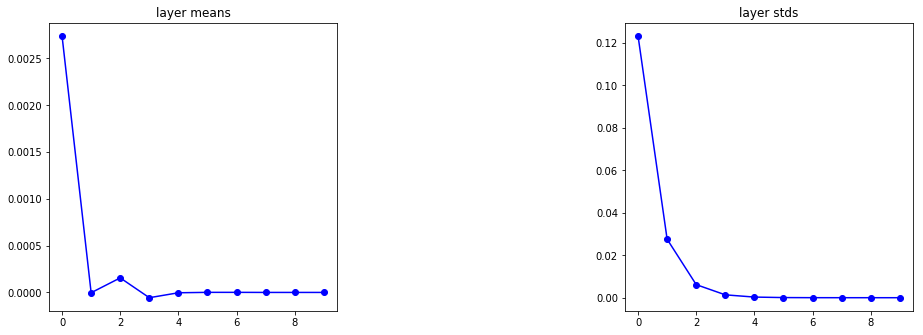

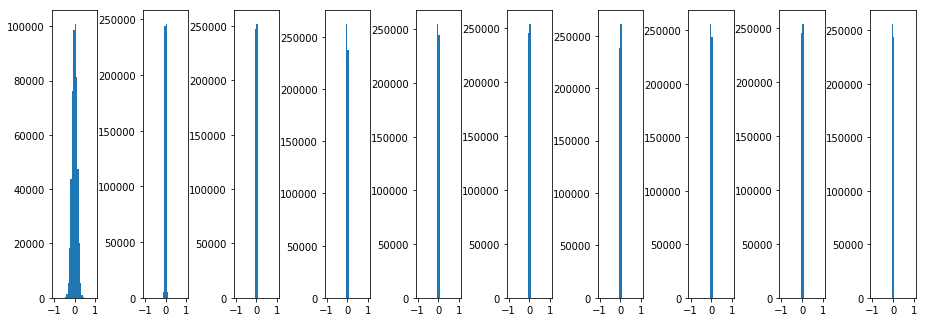

In [33]:
print ("Input layer had mean %f and std %f" % (np.mean(D), np.std(D)))

layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]

for i, H in Hs.items():
    print ("Hidden layer %d had means %f and std %f" % (i + 1, layer_means[i], layer_stds[i]))
    
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, "ob-")
plt.title("layer means")
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, "ob-")
plt.title("layer stds")
plt.subplots_adjust(left=1, bottom=0, right=3, top=1, wspace=1, hspace=1)
fig = plt.figure()
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
plt.subplots_adjust(left=1, bottom=0, right=3, top=1, wspace=1, hspace=1)